In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tushar5harma/plant-village-dataset-updated")

print("Path to dataset files:", path)

100%|██████████| 1.00G/1.00G [00:13<00:00, 82.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tushar5harma/plant-village-dataset-updated/versions/2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


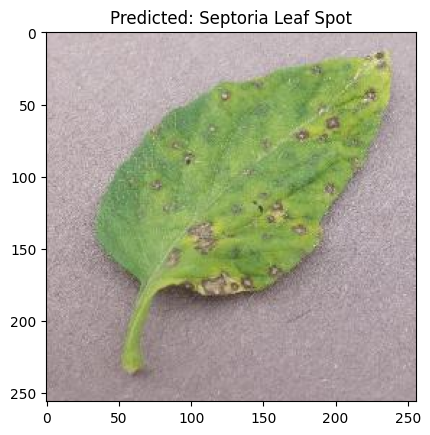

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

def preprocess_image(img_path):
    img = load_img(img_path, target_size=(69, 69))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

model_path = 'model.h5'

if not os.path.exists(model_path):
    le = LabelEncoder()
    data = '/root/.cache/kagglehub/datasets/tushar5harma/plant-village-dataset-updated/versions/2/Tomato'
    a = os.path.join(data, 'Train')
    x = []
    y = []
    for si in os.listdir(a):
        do = os.path.join(a, si)
        # Check if it's a directory before proceeding
        if os.path.isdir(do):
            for fi in os.listdir(do):
                go = os.path.join(do, fi)
                # Check if it's a file and not a hidden file/directory (like .ipynb_checkpoints)
                if os.path.isfile(go) and not fi.startswith('.'):
                    image = load_img(go, target_size=(69, 69))
                    gi = img_to_array(image)
                    x.append(gi)
                    y.append(si)
    kk = np.array(x)
    ll = np.array(y)

    n = le.fit_transform(ll)
    tu = to_categorical(n)

    from sklearn.model_selection import train_test_split
    xtrain, xtest, ytrain, ytest = train_test_split(kk, tu, test_size=0.2)

    model = Sequential()
    model.add(Input((69, 69, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(6, activation='softmax'))  # Assuming 6 classes
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(xtrain, ytrain, epochs=3, batch_size=32, validation_data=(xtest, ytest))

    model.save(model_path)
else:
    model = load_model(model_path)

img_path = r"/root/.cache/kagglehub/datasets/tushar5harma/plant-village-dataset-updated/versions/2/Tomato/Train/Late Blight/0a47b5bc-3e8a-4a3d-9193-161e983f58b5___GHLB2 Leaf 83.2.JPG"
img_array = preprocess_image(img_path)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

class_labels = ['Bacterial Spot', 'Early Blight','Healthy','Late Blight','Septoria Leaf Spot','Yellow Leaf Curl Virus']
predicted_label = class_labels[predicted_class[0]]

plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted: {predicted_label}')
plt.show()